In [4]:
#Import python libraries
import dvc.api
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
import warnings

In [2]:
%load_ext autoreload
%autoreload 2

In [5]:
# import requiered module
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from load_data import LoadData
from preprocessing import Preprocess
from plot_data import PlotData

In [6]:
loader = LoadData()
preprocess = Preprocess()
plot = PlotData()

In [7]:
train_path = 'data/train_merged.csv'
test_path = 'data/test_merged.csv'
repo = 'https://github.com/yonamg/Pharmaceutical-Sales-Prediction'
tra_ver = 'a09c75a'
tst_ver = '95939a9'

In [8]:
train_url = dvc.api.get_url(
    path=train_path,
    repo=repo,
    rev=tra_ver
)
print(train_url)

C:\.dvc\tmp\pharma_data\c8\d22784adf34e32c0fb517a150795ed


In [9]:
# read csv files 
train_df = loader.read_csv(train_url)

In [10]:
test_url = dvc.api.get_url(
    path=test_path,
    repo=repo,
    rev=tst_ver
)
print(test_url)

C:\.dvc\tmp\pharma_data\ac\072eb0cdbb58a154296f8eb4152f5f


In [11]:
# read csv files 
test_df = loader.read_csv(test_url)

In [12]:
train_df.sort_values(["Store","Date"], ignore_index=True, inplace=True)
test_df.sort_values(["Store","Date"], ignore_index=True, inplace=True)

Set data as index

In [13]:
train_df.set_index('Date', inplace=True)
test_df.set_index('Date', inplace=True)

In [14]:
train_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,weekday,weekofyear,weekend
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,1,0,0,0,0,a,1,c,a,...,0,NaN,NaN,NaN,2013,1,1,1,1,0
2013-01-02,1,2,5530,668,1,0,0,1,c,a,...,0,NaN,NaN,NaN,2013,1,2,2,1,0
2013-01-03,1,3,4327,578,1,0,0,1,c,a,...,0,NaN,NaN,NaN,2013,1,3,3,1,0
2013-01-04,1,4,4486,619,1,0,0,1,c,a,...,0,NaN,NaN,NaN,2013,1,4,4,1,0
2013-01-05,1,5,4997,635,1,0,0,1,c,a,...,0,NaN,NaN,NaN,2013,1,5,5,1,1


In [15]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day', 'weekday',
       'weekofyear', 'weekend'],
      dtype='object')

In [16]:
test_df.drop('weekday',inplace=True,axis=1)
test_df.drop('weekofyear',inplace=True,axis=1)
test_df.drop('weekend',inplace=True,axis=1)

In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41088 entries, 2015-08-01 to 2015-09-17
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Open                       41077 non-null  float64
 4   Promo                      41088 non-null  int64  
 5   StateHoliday               41088 non-null  object 
 6   SchoolHoliday              41088 non-null  int64  
 7   StoreType                  41088 non-null  object 
 8   Assortment                 41088 non-null  object 
 9   CompetitionDistance        40992 non-null  float64
 10  CompetitionOpenSinceMonth  25872 non-null  float64
 11  CompetitionOpenSinceYear   25872 non-null  float64
 12  Promo2                     41088 non-null  int64  
 13  Promo2SinceWeek            23856 non-

Some data are missing from Open column

In [18]:
train_df.drop('weekday',inplace=True,axis=1)
train_df.drop('weekofyear',inplace=True,axis=1)
train_df.drop('weekend',inplace=True,axis=1)

In [19]:
train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,2.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774,2.013832e+03,5.846762e+00,1.570279e+01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870,7.773960e-01,3.326097e+00,8.787638e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000,2.013000e+03,1.000000e+00,1.000000e+00
25%,2.800000e+02,1.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000,2.013000e+03,3.000000e+00,8.000000e+00
50%,5.580000e+02,3.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000,2.014000e+03,6.000000e+00,1.600000e+01
75%,8.380000e+02,5.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000,2.014000e+03,8.000000e+00,2.300000e+01
max,1.115000e+03,6.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000,2.015000e+03,1.200000e+01,3.100000e+01


For some of the columns, the mean value is very different from the median (50%) value which means there is an outlier

In [20]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day'],
      dtype='object')

#### Closing price for each day

In [21]:
sales = train_df[["Sales", "StoreType"]]
sales.head()

,Sales,StoreType
Date,,
2013-01-01,0,c
2013-01-02,5530,c
2013-01-03,4327,c
2013-01-04,4486,c
2013-01-05,4997,c


In [22]:
train_df.sort_index(inplace=True)

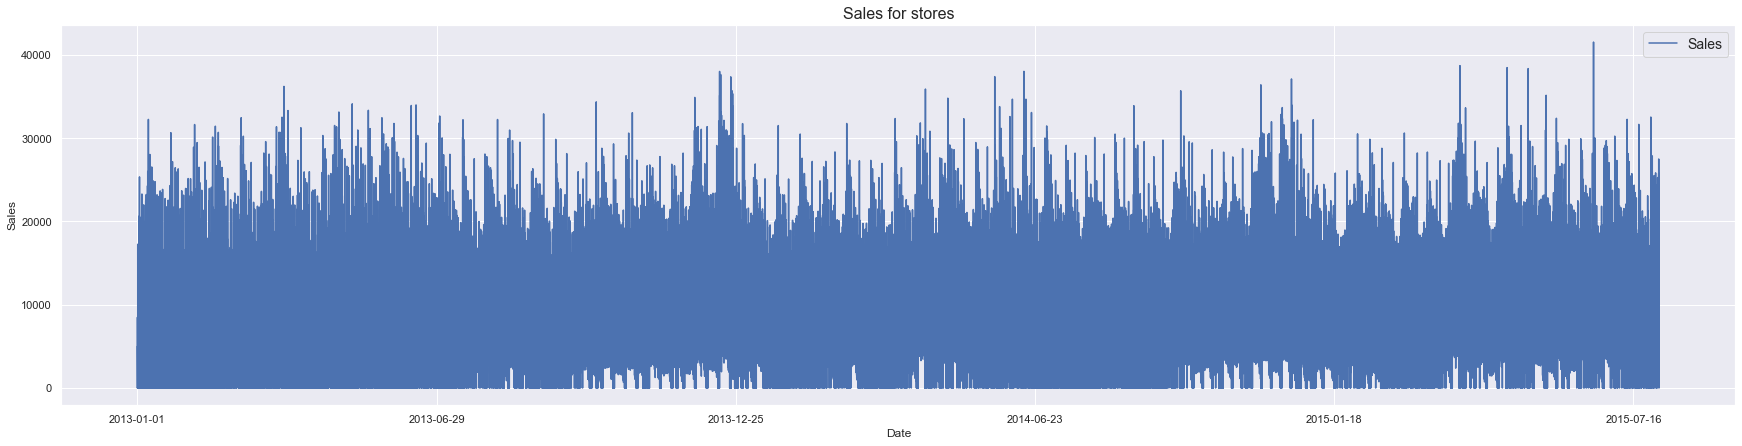

In [23]:
sns.set()
train_df[['Sales', 'StoreType']].plot(figsize=(30, 7))
plt.ylabel("Sales")
plt.title("Sales for stores", fontsize=16)
plt.legend(fontsize=14);

Promotion distribution in both training and test sets

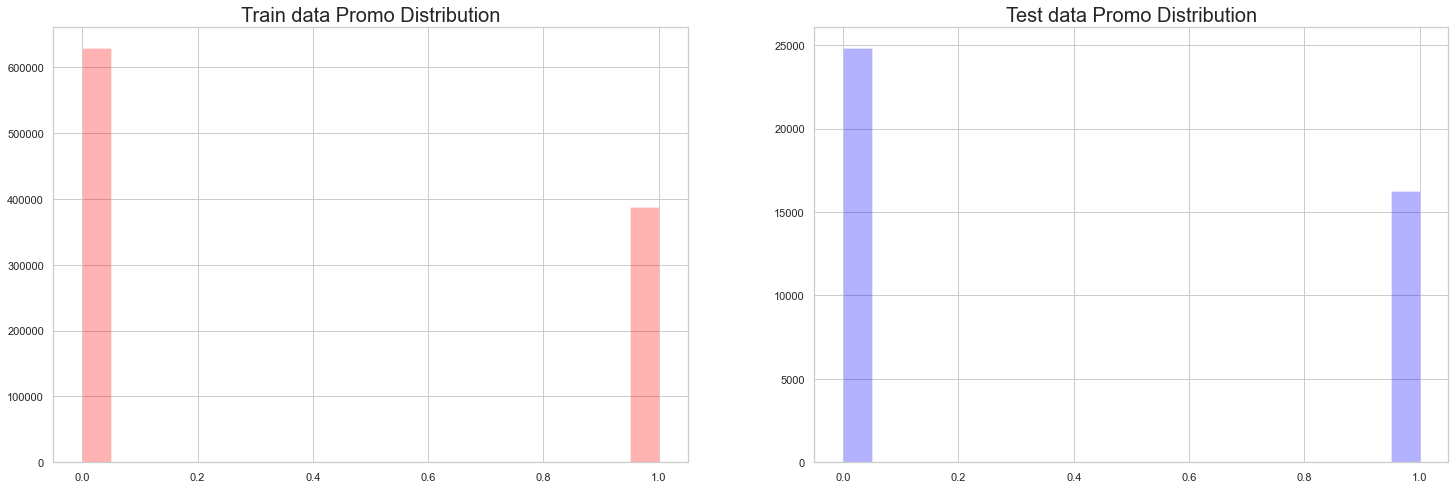

In [24]:
plot.plot_subplots(train_df['Promo'], test_df['Promo'], 'Train data Promo Distribution', 'Test data Promo Distribution')

SchoolHoliday distribution in both training and test sets

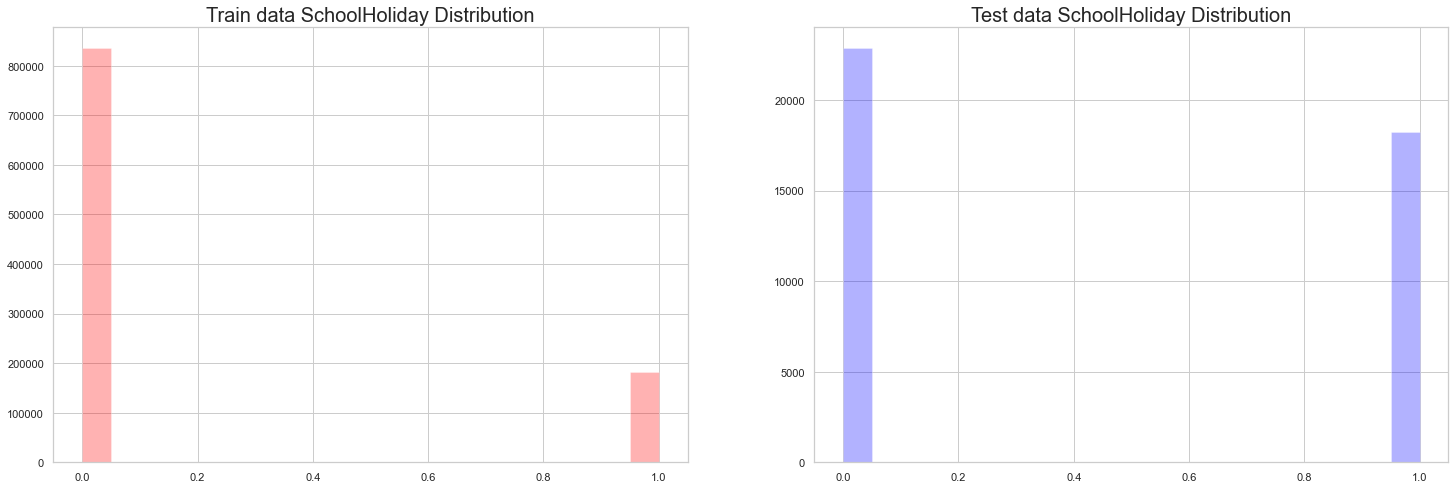

In [25]:
plot.plot_subplots(train_df['SchoolHoliday'], test_df['SchoolHoliday'], 'Train data SchoolHoliday Distribution', 'Test data SchoolHoliday Distribution')

### Multiple plots of numerical features for train and test data

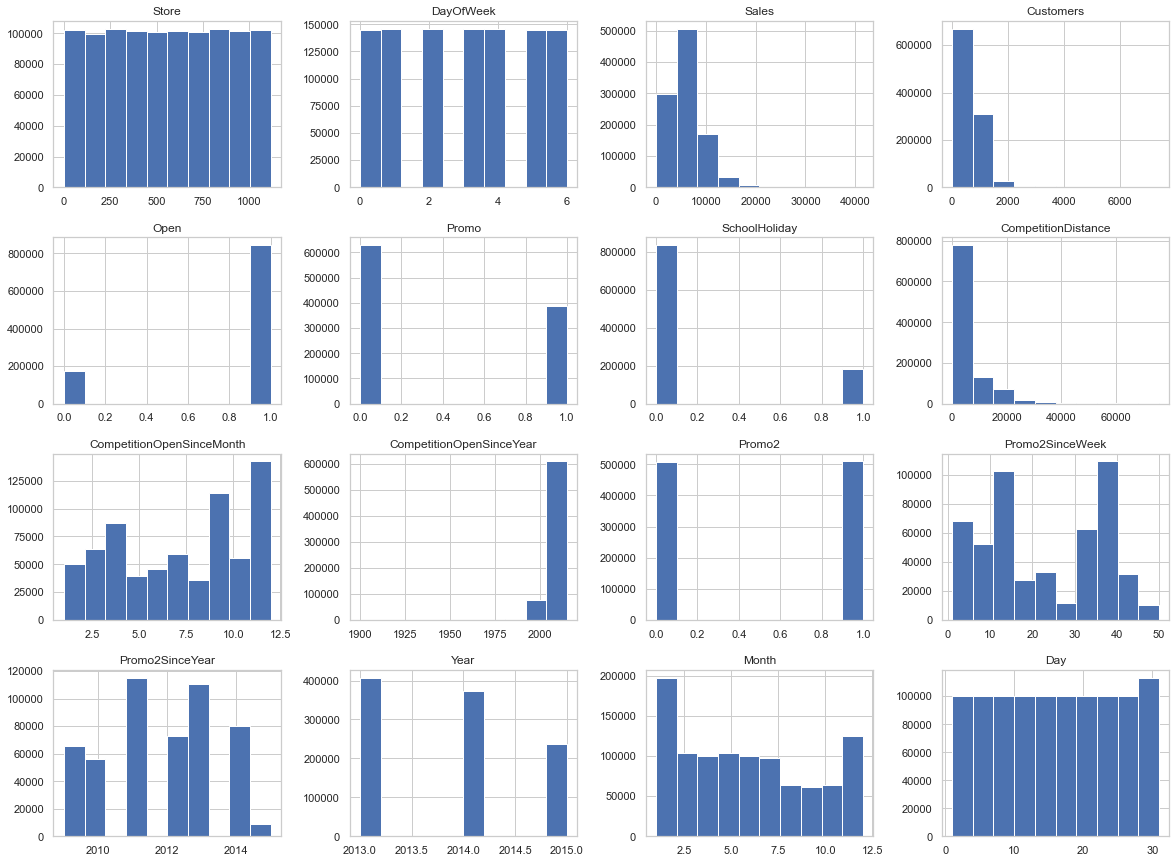

In [26]:
num_feats = list(train_df.select_dtypes(include=['int64', 'float64', 'int32']).columns)
train_df[num_feats].hist(figsize=(20,15));

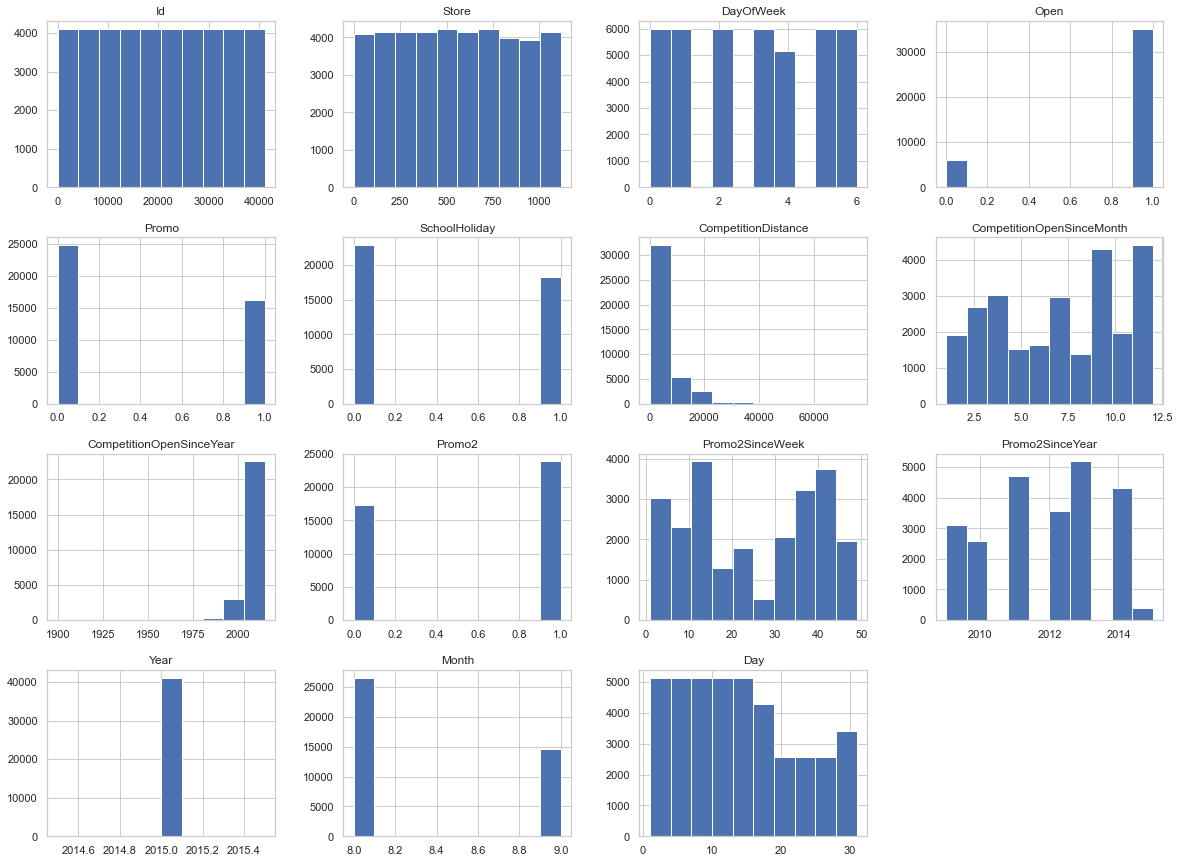

In [27]:
num_feats = list(test_df.select_dtypes(include=['int64', 'float64', 'int32']).columns)
test_df[num_feats].hist(figsize=(20,15));

* It can be seen that some of the features that are in the train does not exist in the test set

Sales during, before and after StateHolyday

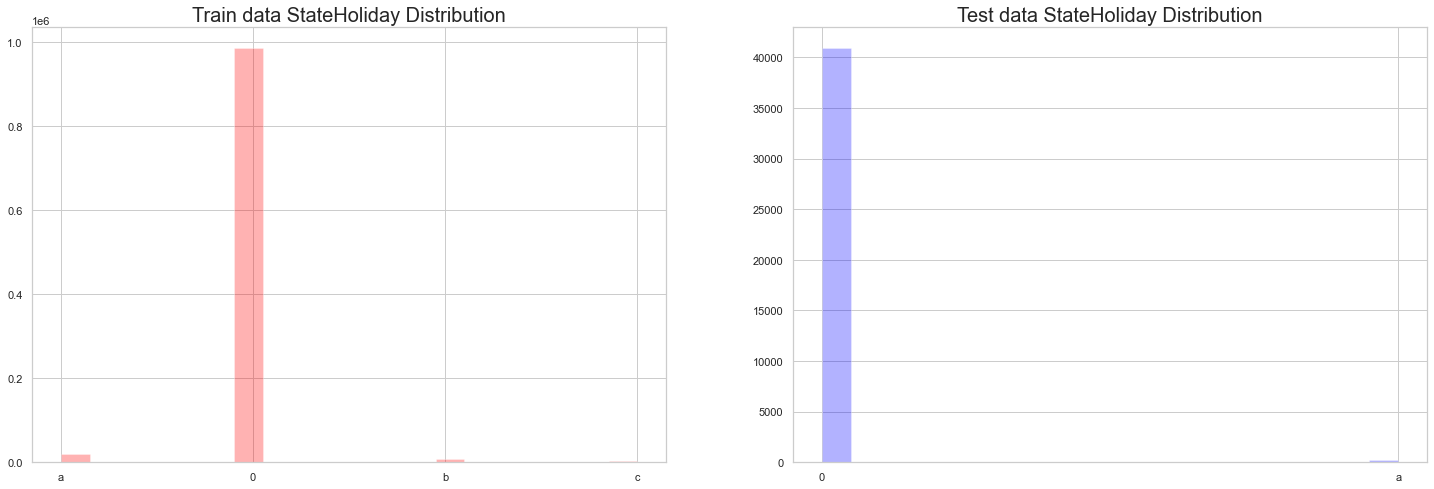

In [28]:
plot.plot_subplots(train_df['StateHoliday'], test_df['StateHoliday'], 'Train data StateHoliday Distribution', 'Test data StateHoliday Distribution')

Using line chart plot sales during, before and after StateHoliday

#### Seasonal behavior of the dataset

In [29]:
# Check & compare sales behavior before, during and after holidays
holiday_df = train_df.groupby(['StateHoliday'])['Sales'].mean().reset_index()
holiday_df.head()

,StateHoliday,Sales
0,0,5947.483893
1,a,290.735686
2,b,214.311510
3,c,168.733171


Renaming stateholiday values

In [30]:
holiday_df.replace({'StateHoliday': {'0': 'No Holiday', 'a': 'Public Holiday', 'b': 'Easter Holiday', 'c': 'Christmas'}}, inplace=True)

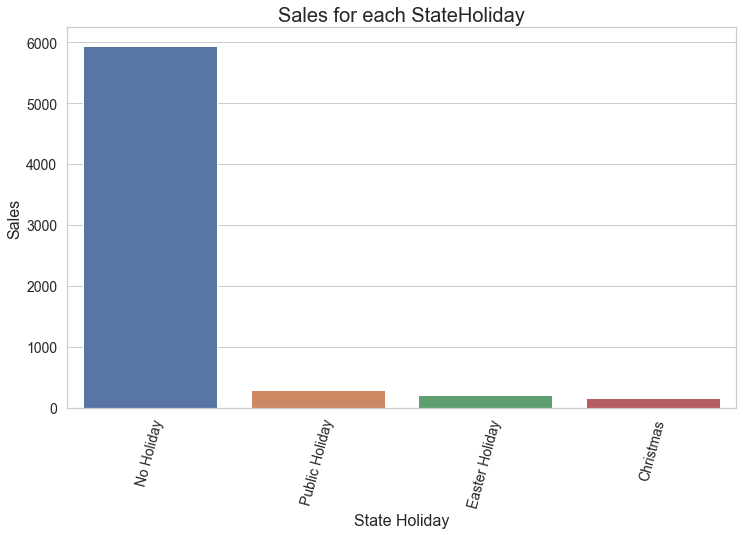

In [31]:
plot.plot_bar(holiday_df, 'StateHoliday', 'Sales', 'Sales for each StateHoliday', 'State Holiday', 'Sales')

* low purchase frequency doring holidays

### Sales on School holidays

In [32]:
school_holiday = train_df.replace({'SchoolHoliday': {0: 'No Holiday', 1: 'School Holiday'}})

In [ ]:
plot.plot_bar(school_holiday, 'SchoolHoliday', 'Sales', 'Sales on SchoolHoliday', 'SchoolHoliday', 'Sales')